#  Clustering

In this notebook we are going to consider cost-based clustering, in particular k-means, and hierarchical clustering, and run and compare them on some simple datasets.

## K-means

We are going to use some synthetic datasets to understand various aspects of Lloyd's algorithm for the k-means  clustering problem.

In [1]:
#put here your ``numero di matricola''
numero_di_matricola = 1 # COMPLETE

In [2]:
#import all packages needed
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import make_blobs, make_circles

We start by generatinga simple dataset using the $\texttt{make_blobs}$ function.

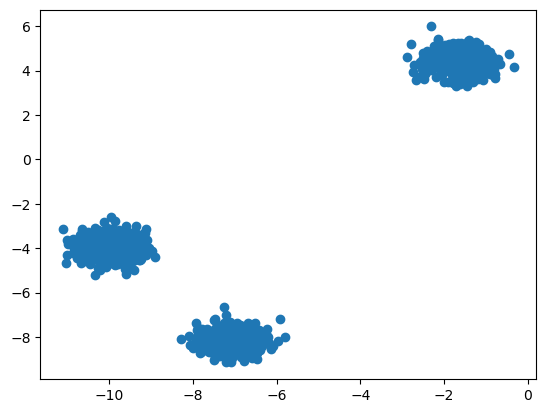

In [3]:
n_samples = 1500

X, y = make_blobs(n_samples=n_samples, cluster_std=[0.4, 0.4, 0.4], random_state =  numero_di_matricola)
plt.scatter(X[:,0], X[:,1])

What do you expect a reasonable clustering algorithm to provide as clustering? 

Let's check if this is what we obtain with the $\texttt{KMeans}$ package.

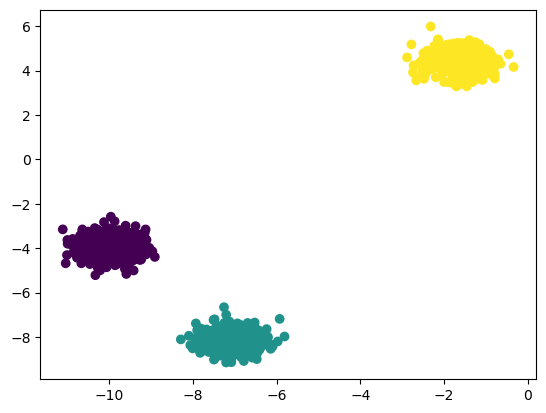

In [4]:
y_pred = KMeans(n_clusters=3, init='random', n_init=1, random_state=numero_di_matricola).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

What is going on here?



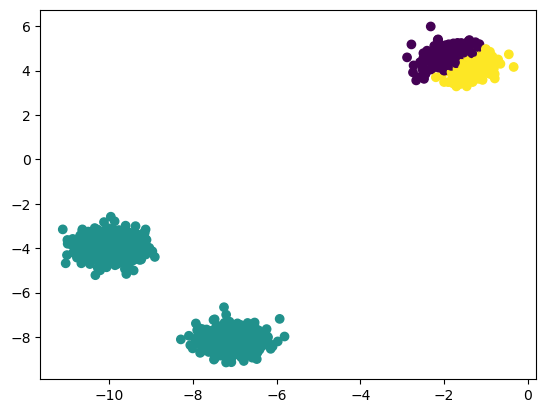

In [5]:
y_pred = KMeans(n_clusters=3, init=np.array([[-2, 5], [-8, -6], [1, 4]]), n_init=1, random_state=numero_di_matricola, ).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

Let's try with a different initialization. How can we obtain one?



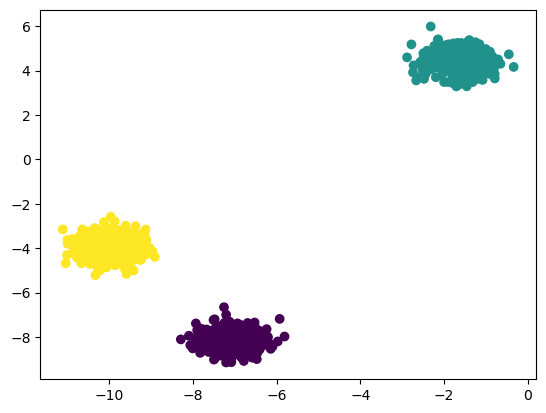

In [6]:
y_pred = KMeans(n_clusters=3, init='random', n_init=1, random_state=numero_di_matricola+1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

This is why in the implementation you can run the algorithm multiple times, see the parameter $\texttt{n_init}$.

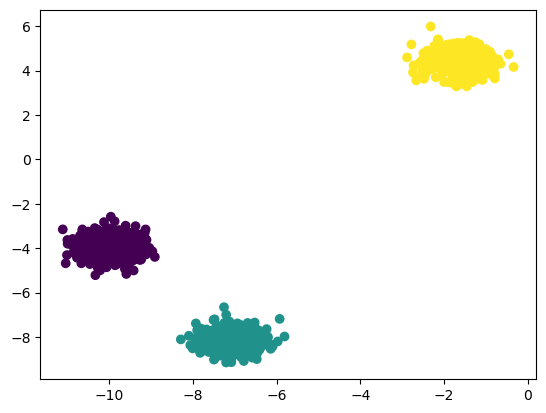

In [7]:
y_pred = KMeans(n_clusters=3, init='random', n_init=10, random_state=numero_di_matricola).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

What about being able to choose the centers that are kind of far away from each other? This is what is achieved by the $\texttt{k-means++}$ initialization algorithm.

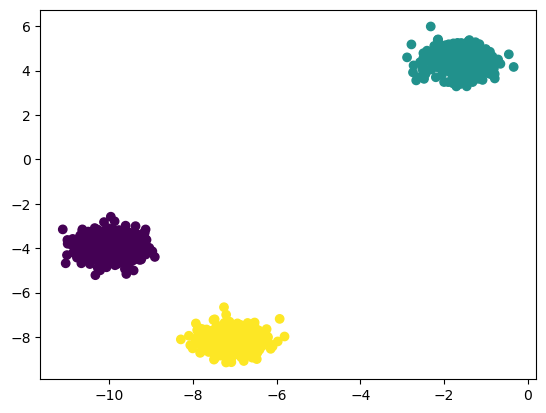

In [8]:
y_pred = KMeans(n_clusters=3, init='k-means++', n_init=1, random_state=numero_di_matricola).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

The results look good on a simple dataset, but what about a more complicated one? Let's generate a dataset using $\texttt{make_circles}$.

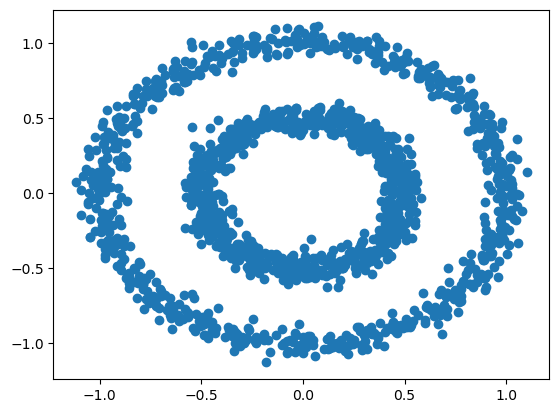

In [9]:
X, y = make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
plt.scatter(X[:,0],X[:,1])

Let's run Lloyd's algorithm with random initialization.

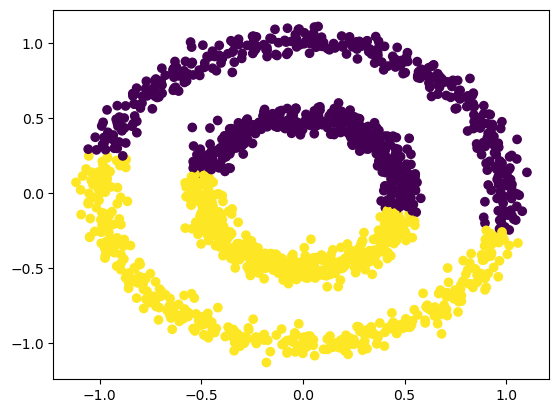

In [10]:
y_pred = KMeans(n_clusters=2, init='random', n_init=50, random_state=numero_di_matricola).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

What about with $\texttt{k-means++}$?

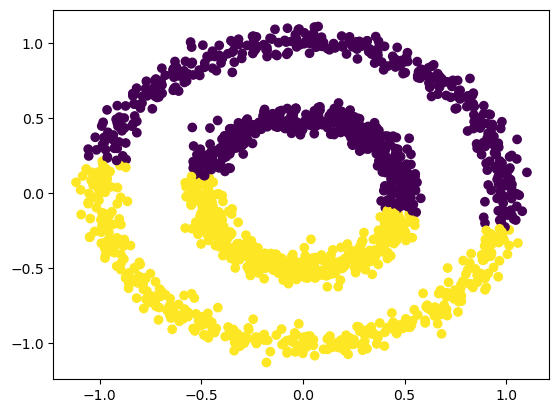

In [11]:
y_pred = KMeans(n_clusters=2, init='k-means++', n_init=100, random_state=numero_di_matricola).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

## Hierarchical clustering

Let's try agglomerative clustering on the examples above, with the various linkage options.

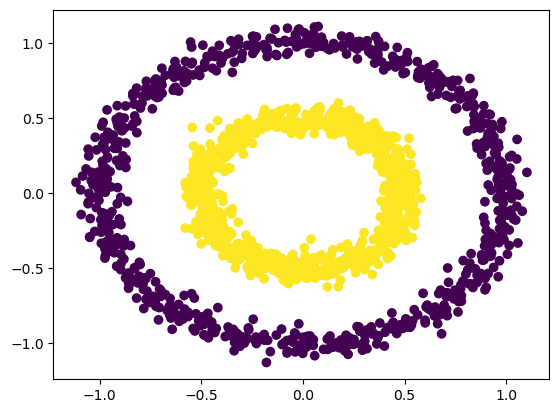

In [12]:
y_pred = AgglomerativeClustering(n_clusters=2, linkage='single').fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

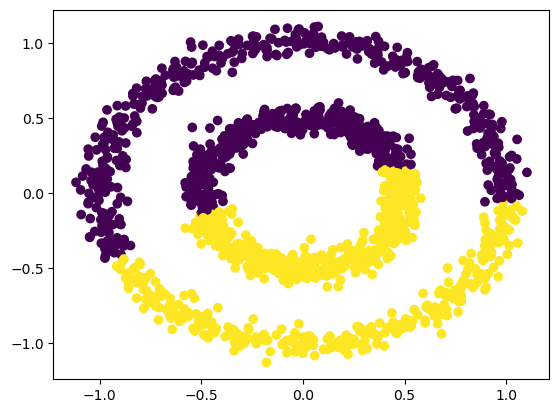

In [13]:
y_pred = AgglomerativeClustering(n_clusters=2, linkage='complete').fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

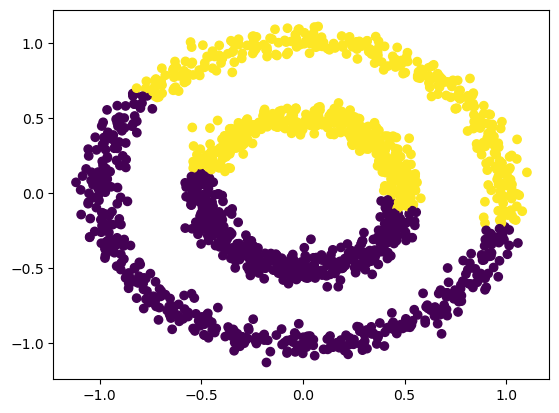

In [14]:
y_pred = AgglomerativeClustering(n_clusters=2, linkage='average').fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

What about the simple dataset we used at the beginning? Let's generate the dataset.

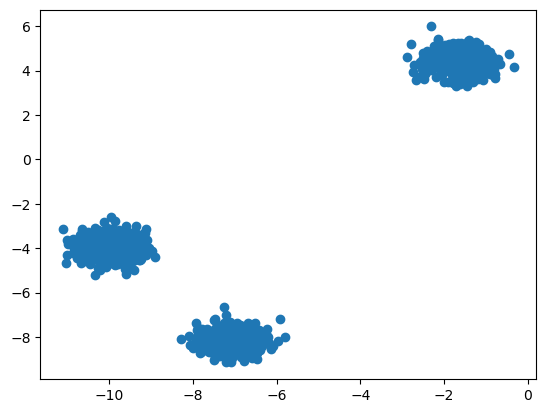

In [15]:
X, y = make_blobs(n_samples=n_samples, cluster_std=[0.4, 0.4, 0.4], random_state =  numero_di_matricola)
plt.scatter(X[:,0], X[:,1])

Let use hierarchical clustering with the various linkage options.

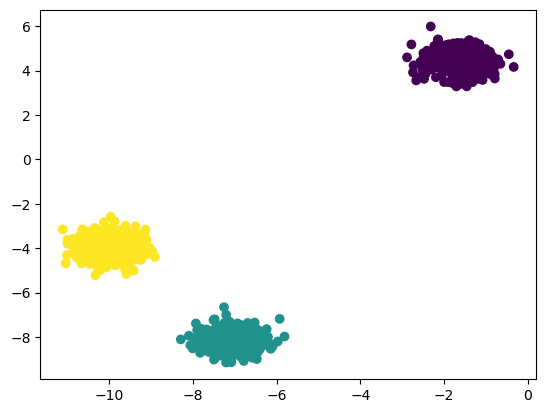

In [16]:
y_pred = AgglomerativeClustering(n_clusters=3, linkage='average').fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

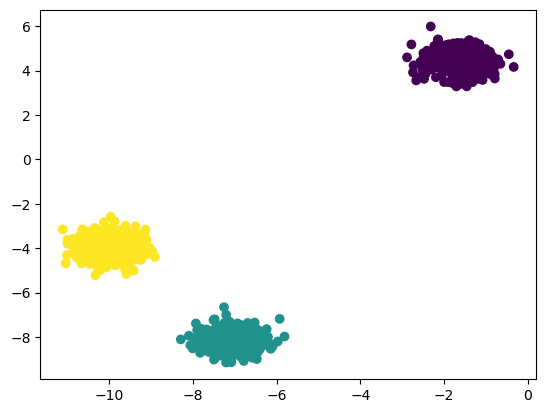

In [17]:
y_pred = AgglomerativeClustering(n_clusters=3, linkage='single').fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

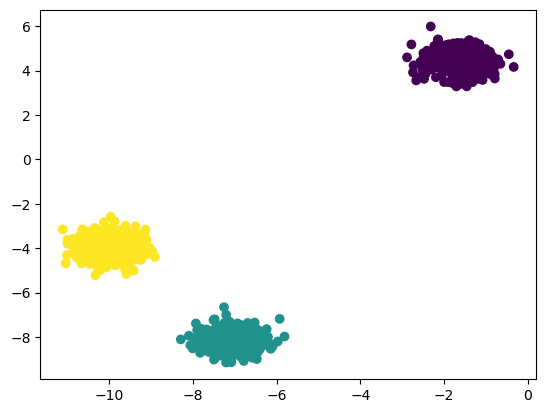

In [18]:
AgglomerativeClustering(n_clusters=2, linkage='complete').fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

Let's try a more complex dataset, but still with some easy to detect cluster structure.

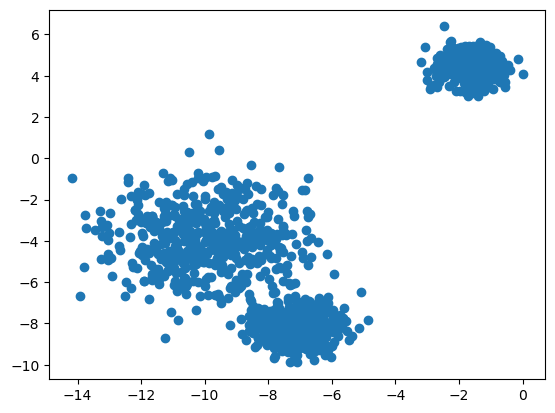

In [19]:
X, y = make_blobs(n_samples=n_samples, cluster_std=[0.5, 1.5, 0.7], random_state =  numero_di_matricola)
plt.scatter(X[:,0], X[:,1])

What do we expect as a reasonable clustering?

Let's try with Lloyd's algorithm, and also with k-means++ initialization.

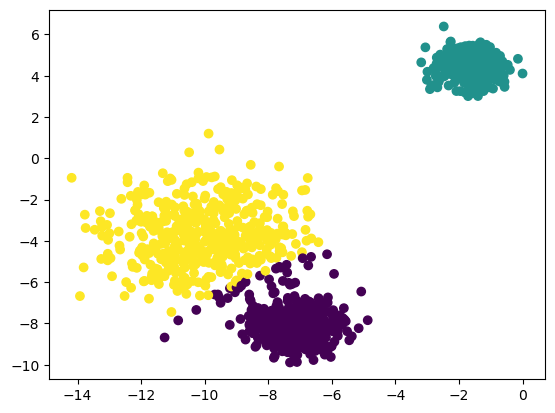

In [20]:
y_pred = KMeans(n_clusters=3, init='random', n_init=10, random_state=numero_di_matricola).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

/Users/vandinfa/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


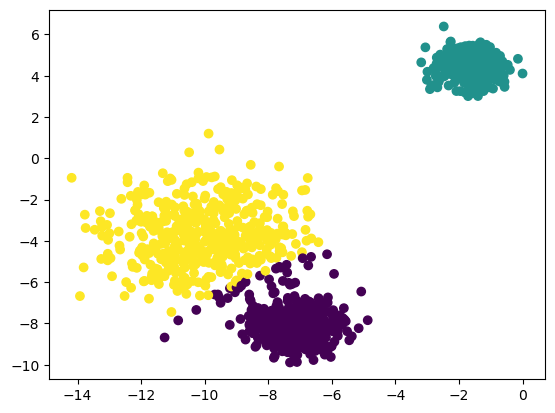

In [21]:
y_pred = KMeans(n_clusters=3, init='k-means++', random_state=numero_di_matricola).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

What about hierarchical clustering?

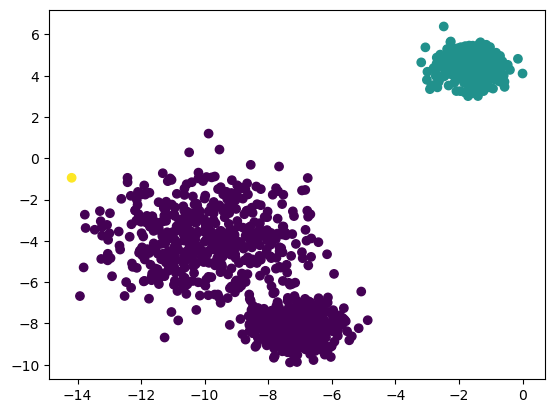

In [22]:
y_pred = AgglomerativeClustering(n_clusters=3, linkage='single').fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

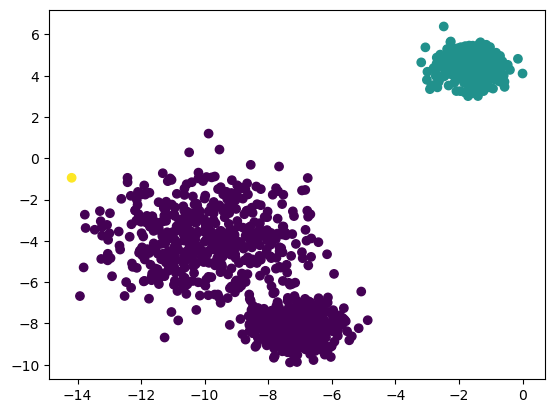

In [23]:
y_pred = AgglomerativeClustering(n_clusters=3, linkage='average').fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

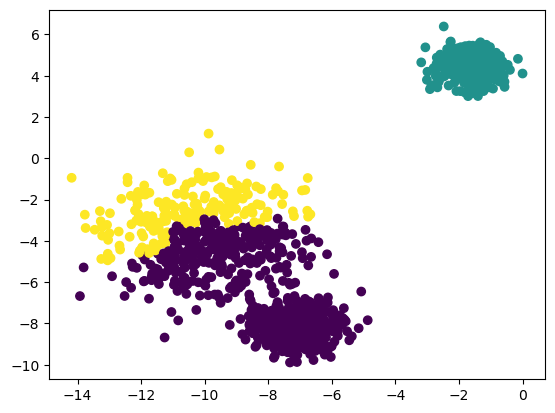

In [25]:
y_pred = AgglomerativeClustering(n_clusters=3, linkage='complete').fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)